In [15]:
!pip install pandas
import pandas as pd

# Load the two datasets (update with your actual paths)
data_mat = pd.read_csv('/Users/HarryXiao/Desktop/student-mat.csv', sep=';', encoding='utf-8')
data_por = pd.read_csv('/Users/HarryXiao/Desktop/student-por.csv', sep=';', encoding='utf-8')


# Select independent features for the model
selected_features = ['failures', 'studytime', 'higher', 'famsup', 'schoolsup', 
                     'Medu', 'Fedu', 'absences', 'health', 'activities', 'internet', 'goout']

# Prepare feature matrix (X) and target variable (y)
X = data_mat[selected_features]
y = data_mat['G3']

# Convert categorical variables to numeric (e.g., Yes/No to 1/0)
X = pd.get_dummies(X, drop_first=True)




Training set size: 296
Testing set size: 99
Model coefficients: [-1.83606119  0.31078281  0.65227662 -0.39917592  0.02954406 -0.02392766
 -0.40042748  2.53897162 -1.07807732 -0.69114182 -0.42755101  0.98430227]
Model intercept: 8.527617876701644
Mean Squared Error (MSE): 20.32
R-squared (R^2): 0.12


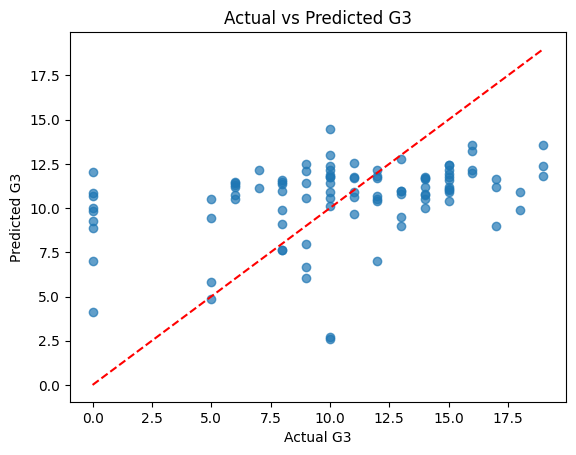

In [12]:
!pip install scikit-learn
!pip install matplotlib

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3')
plt.show()



In [ ]:
Mean Squared Error (MSE):
The MSE was 20.32 
R-squared (R²):
The R² value was 0.12, indicating that only 12% of the variance in the target variable (G3) is explained by the model. This is relatively low, suggesting the model does not capture the data well and might need improvement through feature selection, engineering, or using more complex models.
Actual vs Predicted Plot:
The scatter plot compares actual G3 scores with predicted ones. The red dashed line represents perfect predictions (y = x). The spread of the points around the line shows that predictions deviate significantly from the true values, particularly at the extremes.

Alpha: 0.01
Mean Squared Error: 20.32
R-squared: 0.12

Alpha: 0.1
Mean Squared Error: 20.31
R-squared: 0.12

Alpha: 1
Mean Squared Error: 20.25
R-squared: 0.12

Alpha: 10
Mean Squared Error: 19.86
R-squared: 0.14

Alpha: 100
Mean Squared Error: 19.52
R-squared: 0.15

Best Alpha: 1
Final Mean Squared Error: 20.25
Final R-squared: 0.12


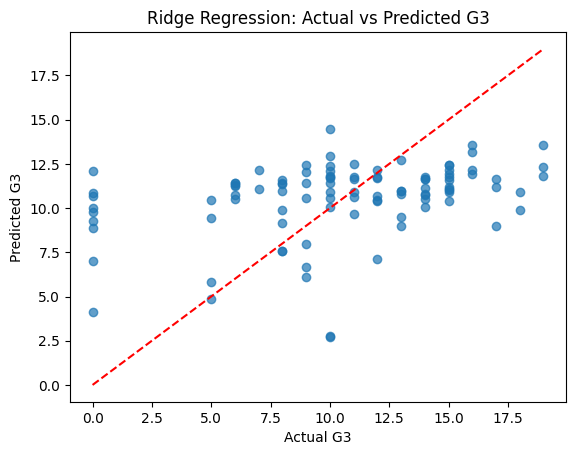

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
alphas = [0.01, 0.1, 1, 10, 100]  # Test different alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Initialize Ridge Regression with current alpha
    ridge.fit(X_train, y_train)  # Fit the model
    
    # Make predictions
    y_pred = ridge.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")
best_alpha = 1  # Replace with the chosen alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

y_pred_best = ridge_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Alpha: {best_alpha}")
print(f"Final Mean Squared Error: {mse_best:.2f}")
print(f"Final R-squared: {r2_best:.2f}")
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Ridge Regression: Actual vs Predicted G3")
plt.show()


In [ ]:
As alpha increased, the Mean Squared Error (MSE) slightly decreased
The R-squared (R²) improved slightly to 0.15 as alpha increased, but it remains relatively low. 


Alpha: 0.01
Mean Squared Error: 20.18
R-squared: 0.12

Alpha: 0.1
Mean Squared Error: 19.37
R-squared: 0.16

Alpha: 1
Mean Squared Error: 22.25
R-squared: 0.03

Alpha: 10
Mean Squared Error: 23.05
R-squared: -0.00

Alpha: 100
Mean Squared Error: 23.05
R-squared: -0.00

Best Alpha: 0.1
Final Mean Squared Error: 19.37
Final R-squared: 0.16


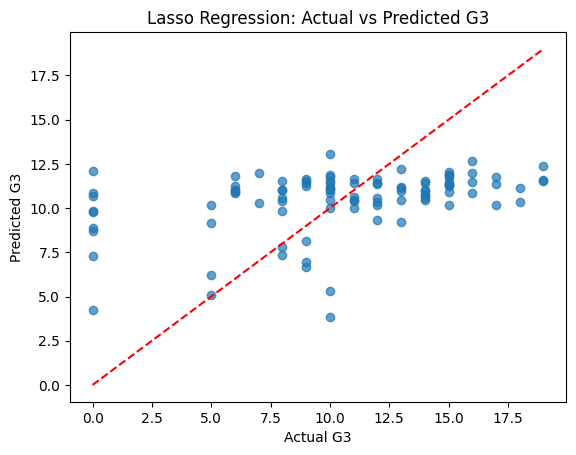

In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set different alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]
results = []

# Iterate over each alpha to train and evaluate the model
for alpha in alphas:
    # Initialize the Lasso regression model
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((alpha, mse, r2))

    # Print the evaluation metrics for each alpha
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

# Identify the best alpha based on the minimum MSE
best_result = min(results, key=lambda x: x[1])
best_alpha = best_result[0]

# Print the best alpha and corresponding performance
print(f"Best Alpha: {best_alpha}")
print(f"Final Mean Squared Error: {best_result[1]:.2f}")
print(f"Final R-squared: {best_result[2]:.2f}")

# Retrain the model with the best alpha and visualize results
model = Lasso(alpha=best_alpha, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Lasso Regression: Actual vs Predicted G3")
plt.show()



In [ ]:
The best alpha value is 0.1, which minimizes the Mean Squared Error (MSE) to 19.37 and provides an R^2 of 0.16.